<a href="https://colab.research.google.com/github/Sourav61/MLnow_2.0/blob/main/3.1_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title This notebook was created for code illustration of the `ML.now()` course

print('''
`Univariate Linear Regression`

[Link to Download the dataset](https://www.kaggle.com/arashnic/hr-ana?select=train.csv)

**Date Created**: 
June 11, 2021

**Author**:
 Sourav Pahwa

**Reach out**:
[GitHub](https://github.com/Sourav61) | [LinkedIn](https://www.linkedin.com/in/sourav-pahwa-93b4041b6/) | [Gmail](mailto:sourav61pahwa@gmail.com)

[[Course Repository](https://github.com/Sourav61/MLnow_2.0)]

Feel free to check out my [website](https://sourav61.github.io/progate/) for more information''')


`Univariate Linear Regression`

[Link to Download the dataset](https://www.kaggle.com/arashnic/hr-ana?select=train.csv)

**Date Created**: 
June 11, 2021

**Author**:
 Sourav Pahwa

**Reach out**:
[GitHub](https://github.com/Sourav61) | [LinkedIn](https://www.linkedin.com/in/sourav-pahwa-93b4041b6/) | [Gmail](mailto:sourav61pahwa@gmail.com)

[[Course Repository](https://github.com/Sourav61/MLnow_2.0)]

Feel free to check out my [website](https://sourav61.github.io/progate/) for more information


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import sklearn
from scipy import stats
import imblearn

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
df = pd.read_csv('train.csv')
dft = pd.read_csv('test.csv')

In [6]:
print("The shape of training Data is: ", df.shape)

print("The shape of training Data is: ", dft.shape)

The shape of training Data is:  (54808, 14)
The shape of training Data is:  (23490, 13)


In [7]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
dft.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [9]:
df.describe().style.background_gradient(cmap='PuBu', low=0, high=0, axis=0, subset=None, text_color_threshold=0.408, vmin=None, vmax=None)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
df.describe(include="object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [13]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [14]:
df.tail(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54798,40257,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.0,4,1,0,51,0
54799,68093,Procurement,region_2,Master's & above,f,other,1,50,5.0,6,1,1,67,0
54800,39227,HR,region_11,Bachelor's,m,other,2,34,5.0,3,0,0,52,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,0,78,0
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [15]:
dft.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [16]:
dft.tail(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23480,11837,Operations,region_33,Bachelor's,f,sourcing,1,29,5.0,6,1,0,60
23481,78278,Operations,region_22,Master's & above,m,other,2,40,5.0,3,1,0,60
23482,27284,Sales & Marketing,region_2,NaN,m,sourcing,2,44,4.0,4,0,0,49
23483,49291,Sales & Marketing,region_30,Bachelor's,m,other,1,34,3.0,5,0,0,49
23484,47537,Sales & Marketing,region_20,Bachelor's,m,other,1,28,4.0,2,0,0,51
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [17]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df)

,Data Type,No of Levels,Levels
employee_id,int64,54808,[65438 65141 7513 ... 13918 13614 51526]
department,object,9,['Sales & Marketing' 'Operations' 'Technology'...
region,object,34,['region_7' 'region_22' 'region_19' 'region_23...
education,object,3,"[""Master's & above"" ""Bachelor's"" nan 'Below Se..."
gender,object,2,['f' 'm']
recruitment_channel,object,3,['sourcing' 'other' 'referred']
no_of_trainings,int64,10,[ 1 2 3 4 7 5 6 8 10 9]
age,int64,41,[35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 ...
previous_year_rating,float64,5,[ 5. 3. 1. 4. nan 2.]
length_of_service,int64,35,[ 8 4 7 10 2 5 6 1 3 16 9 11 26 12 17 ...


In [18]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [19]:
df.duplicated().sum() 

0

In [20]:
df.isnull().sum(axis=0)

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
df_total = df.isnull().sum()

df_percent = ((df.isnull().sum()/df.shape[0])*100).round(2)

dft_total = dft.isnull().sum()

dft_percent = ((dft.isnull().sum()/dft.shape[0])*100).round(2)

df_missing_data = pd.concat([df_total, df_percent, dft_total, dft_percent],
                                axis=1, 
                                keys=['df_Total', 'df_Percent %','dft_Total', 'dft_Percent %'],
                                sort = True)

df_missing_data.style.bar(color = ['green'])

,df_Total,df_Percent %,dft_Total,dft_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


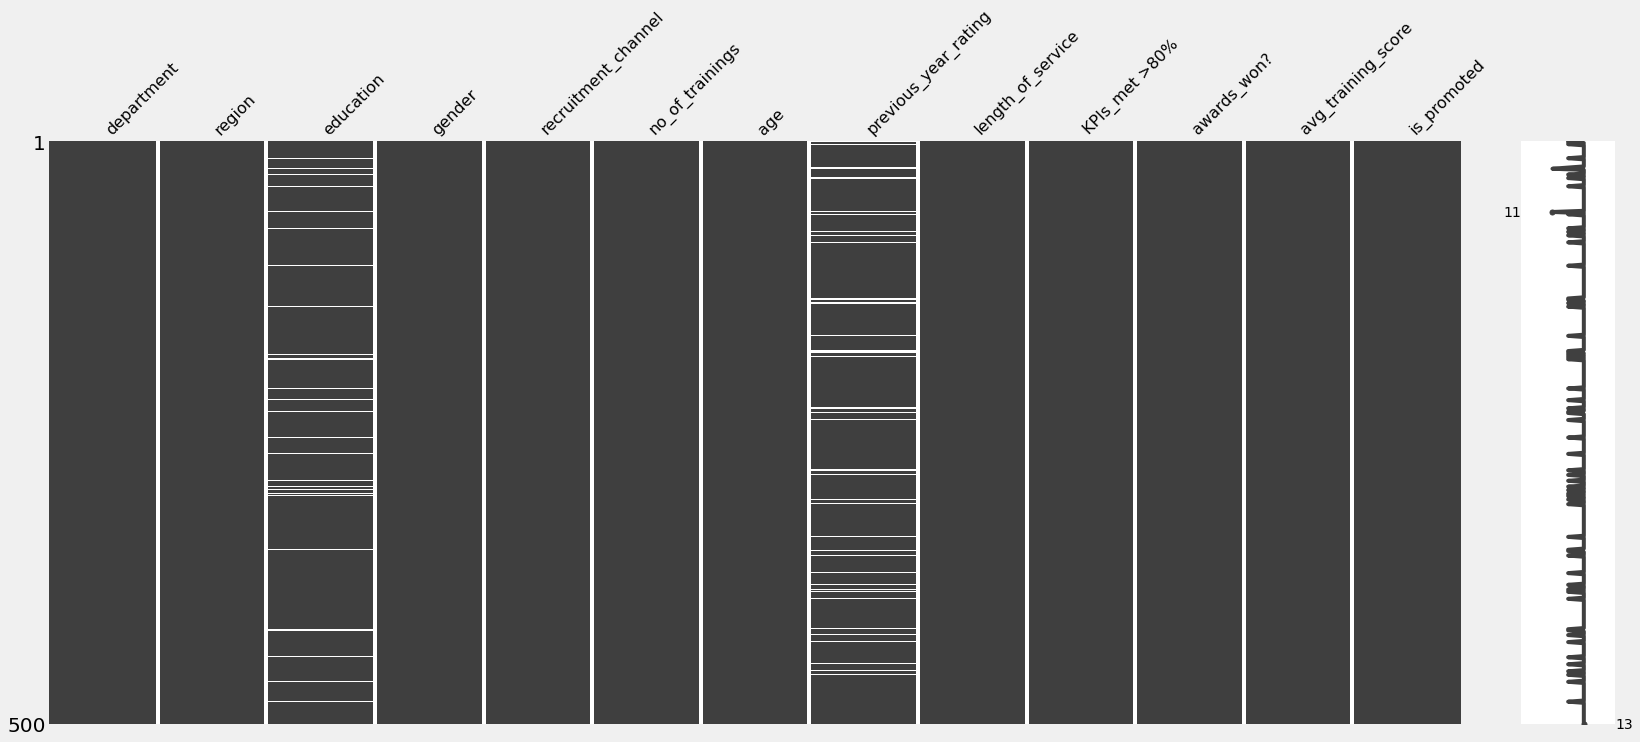

In [22]:
msno.matrix(df.drop('employee_id', axis='columns').sample(500))
plt.show()

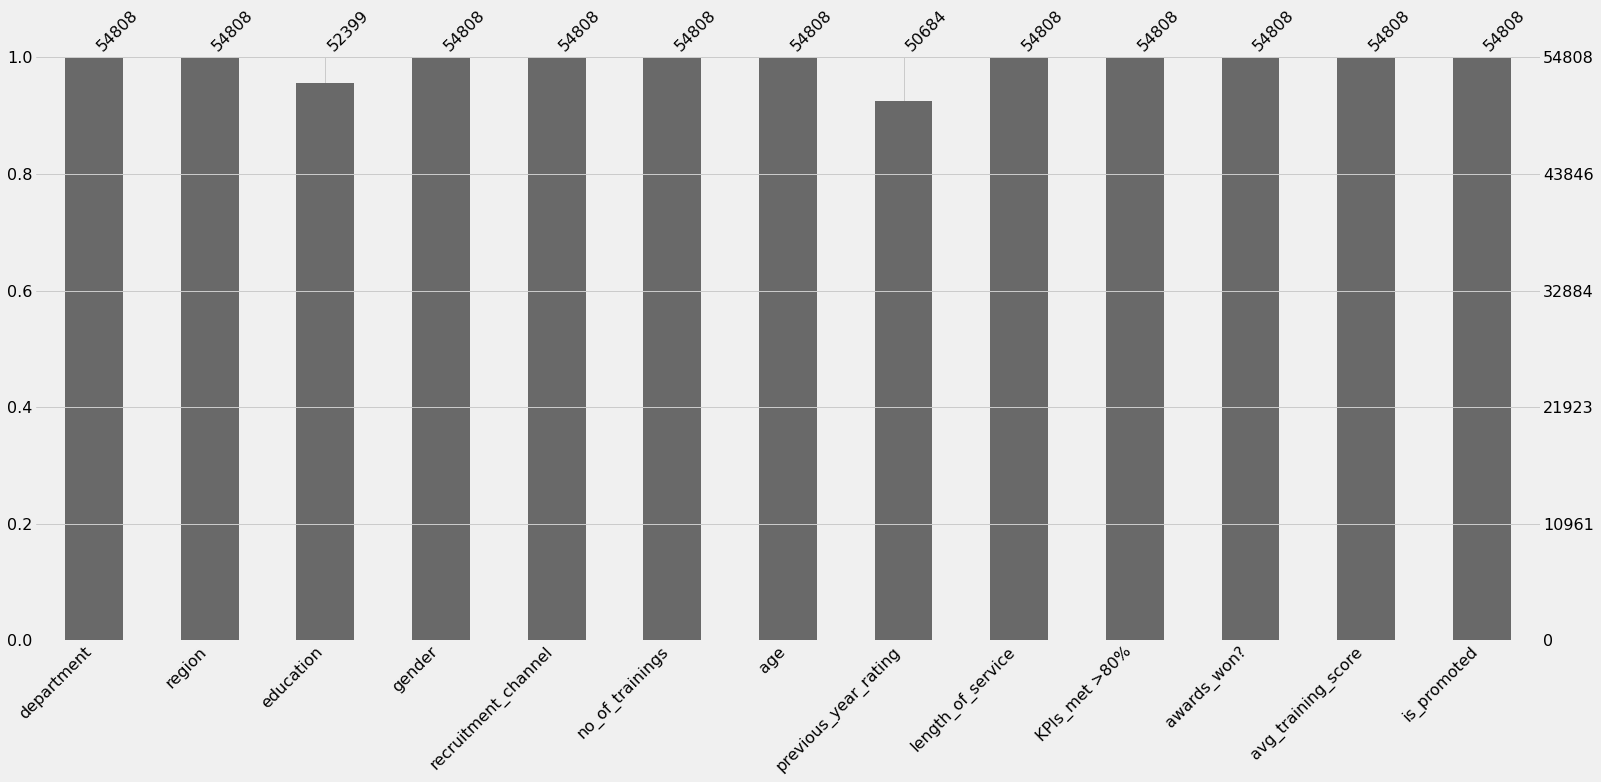

In [23]:
msno.bar(df.drop('employee_id', axis='columns'))
plt.show()

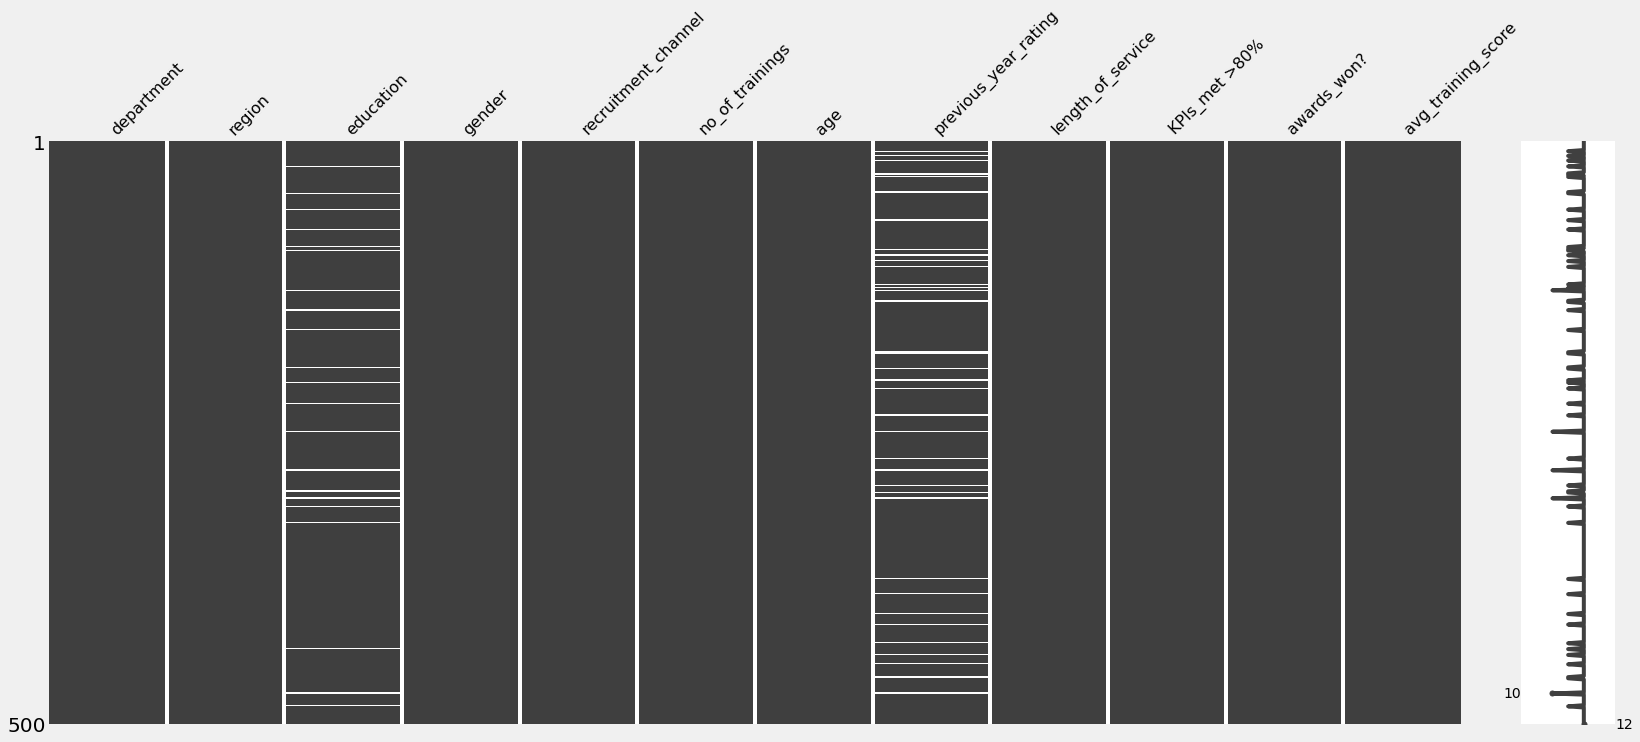

In [24]:
msno.matrix(dft.drop('employee_id', axis='columns').sample(500))
plt.show()

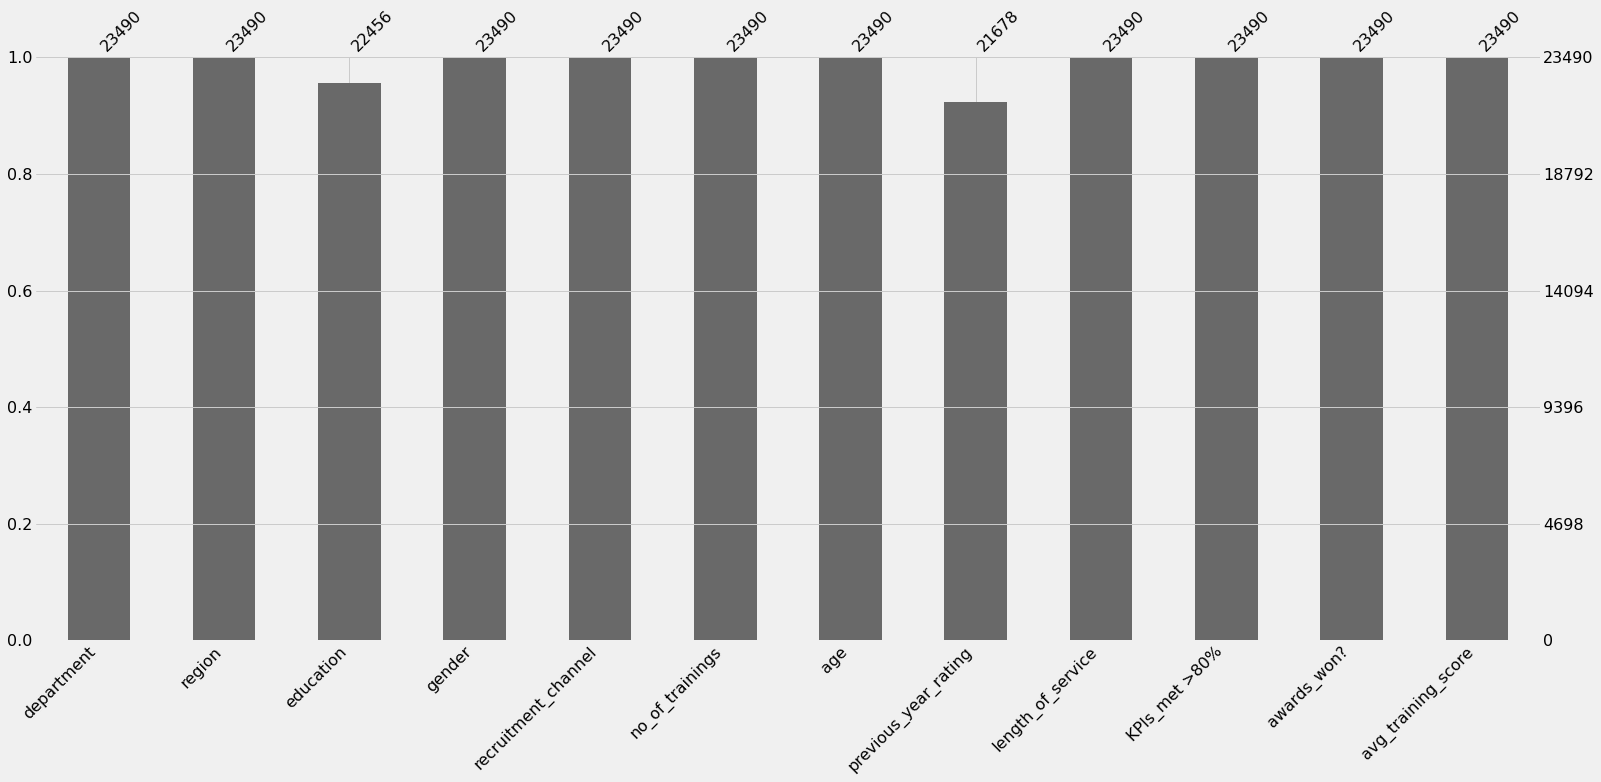

In [25]:
msno.bar(dft.drop('employee_id', axis='columns'))
plt.show()

In [26]:
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

print("Number of Missing Values Left in the Training Data :", df.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [27]:
dft['education'] = dft['education'].fillna(dft['education'].mode()[0])
dft['previous_year_rating'] = dft['previous_year_rating'].fillna(dft['previous_year_rating'].mode()[0])

print("Number of Missing Values Left in the Training Data :", dft.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


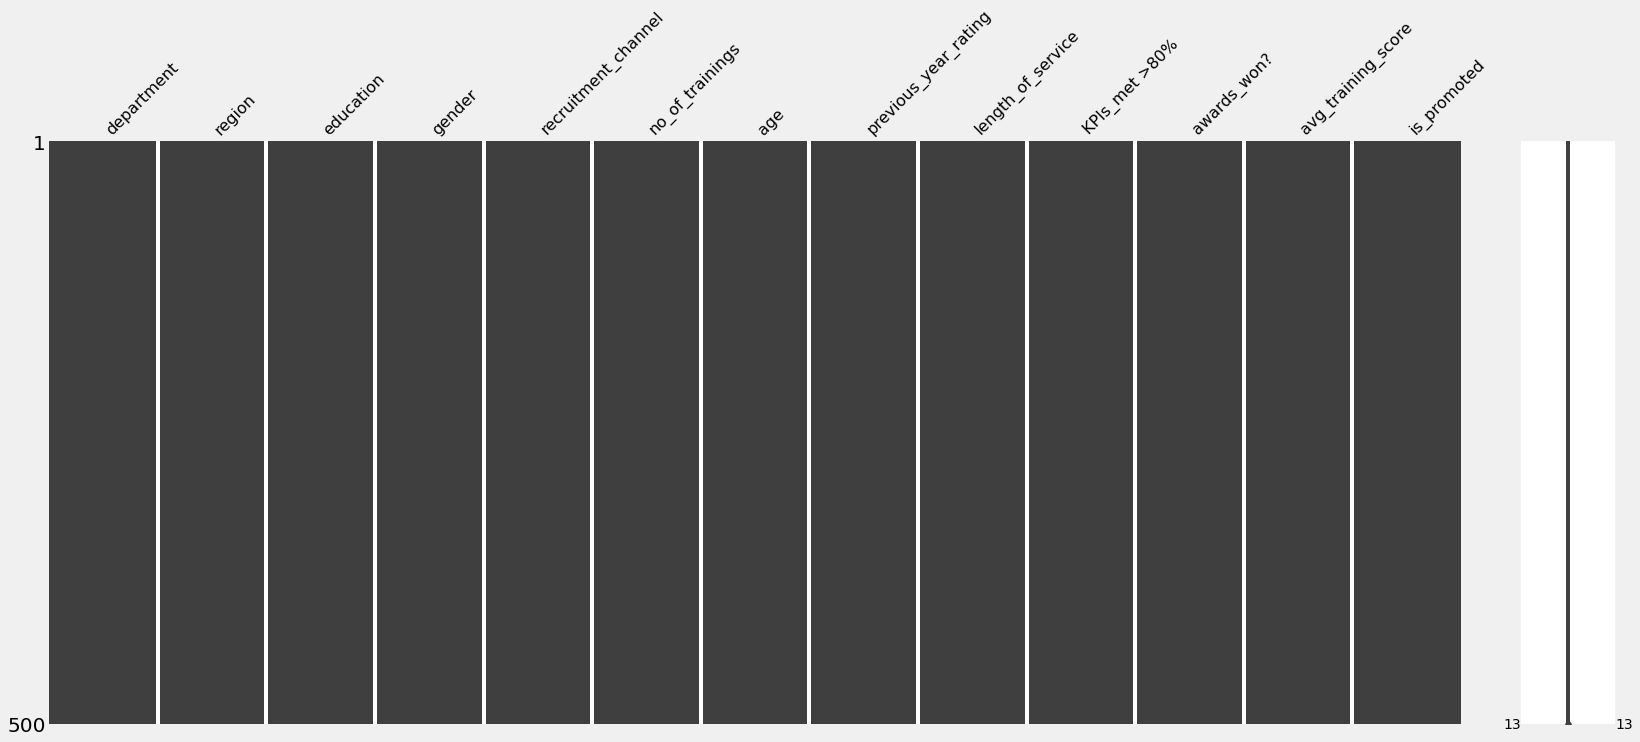

In [28]:
msno.matrix(df.drop('employee_id', axis='columns').sample(500))
plt.show()

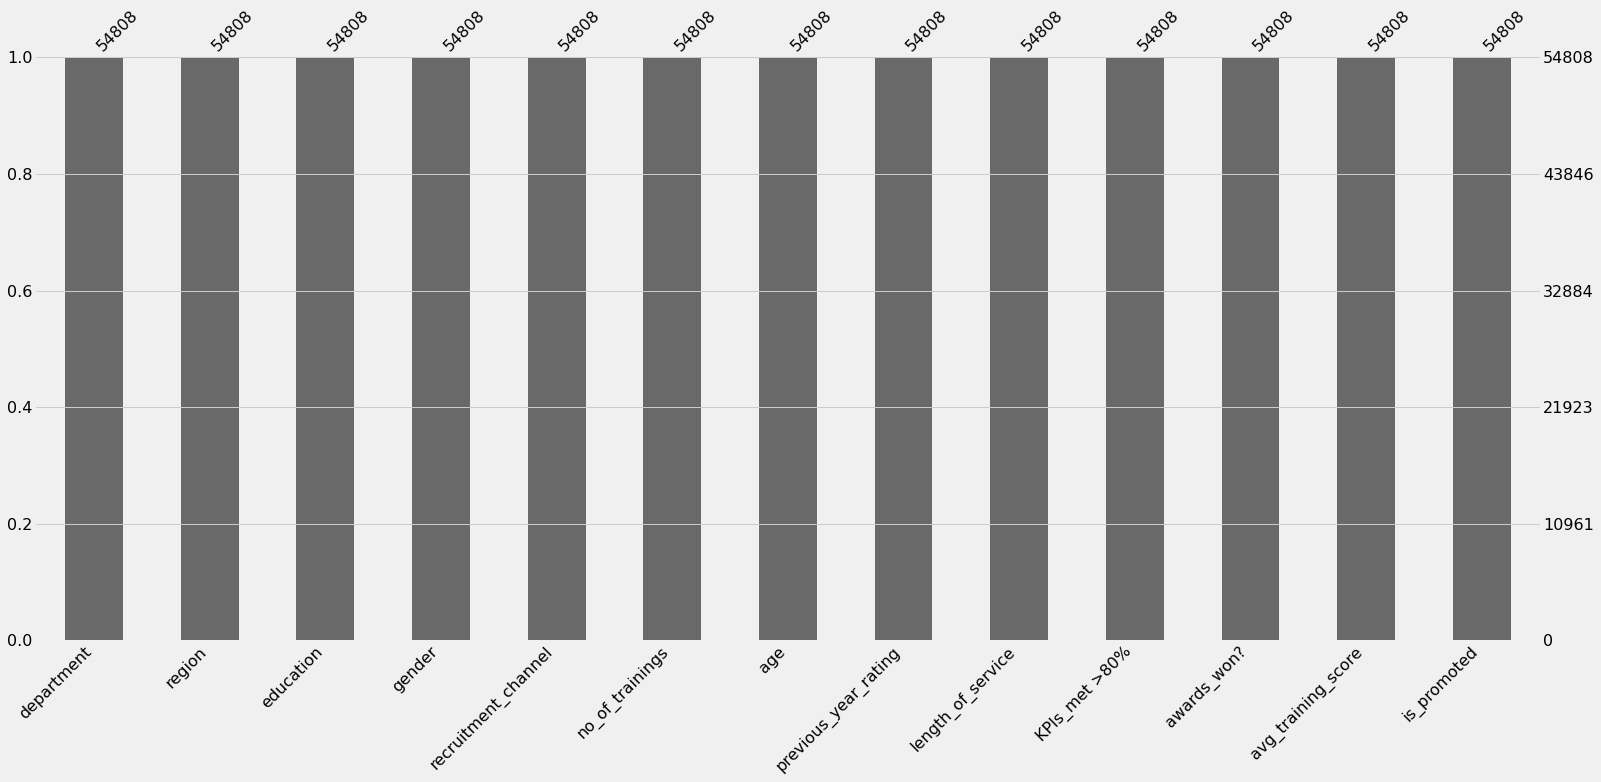

In [29]:
msno.bar(df.drop('employee_id', axis='columns'))
plt.show()

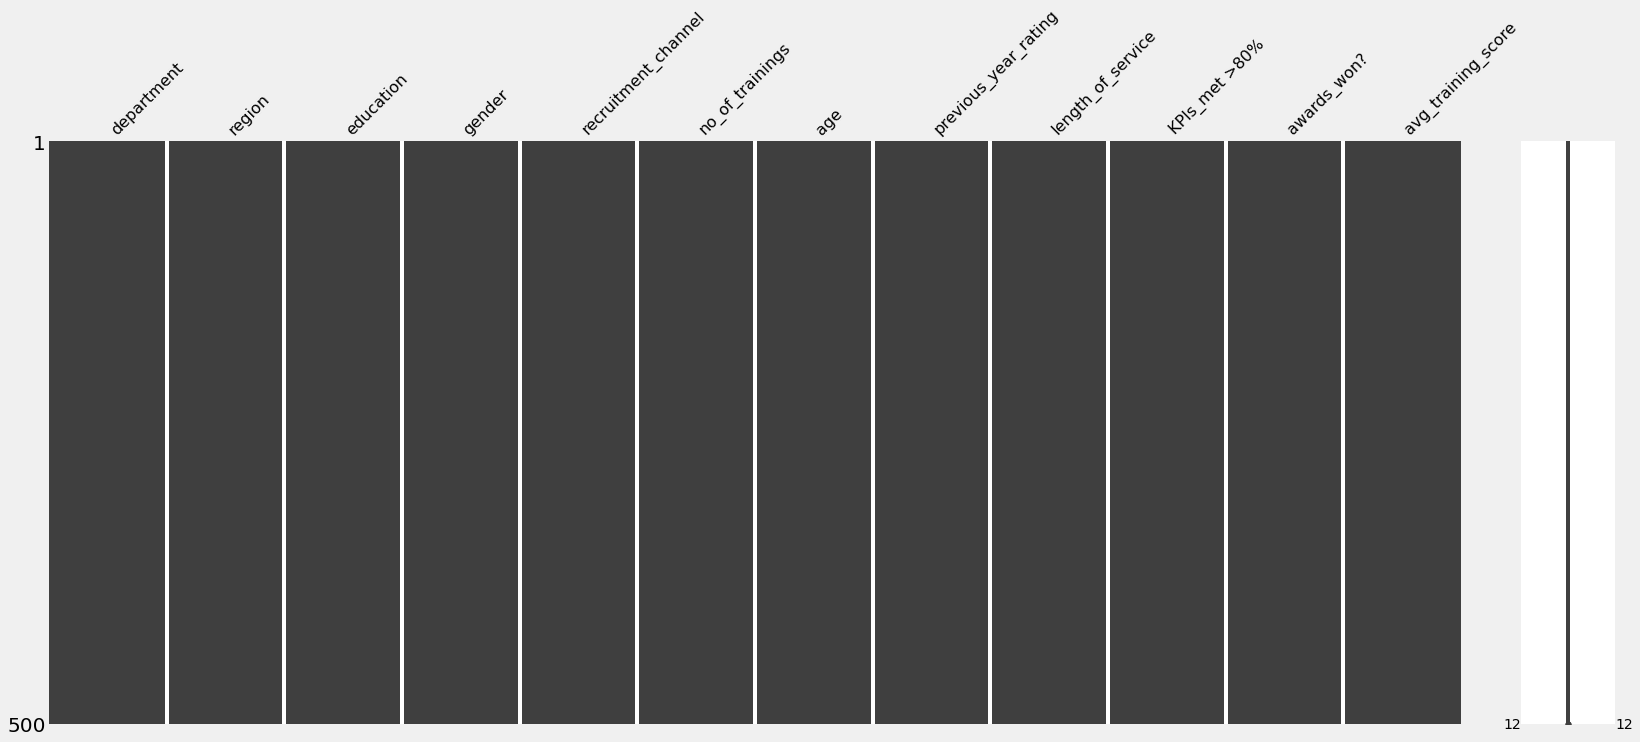

In [30]:
msno.matrix(dft.drop('employee_id', axis='columns').sample(500))
plt.show()

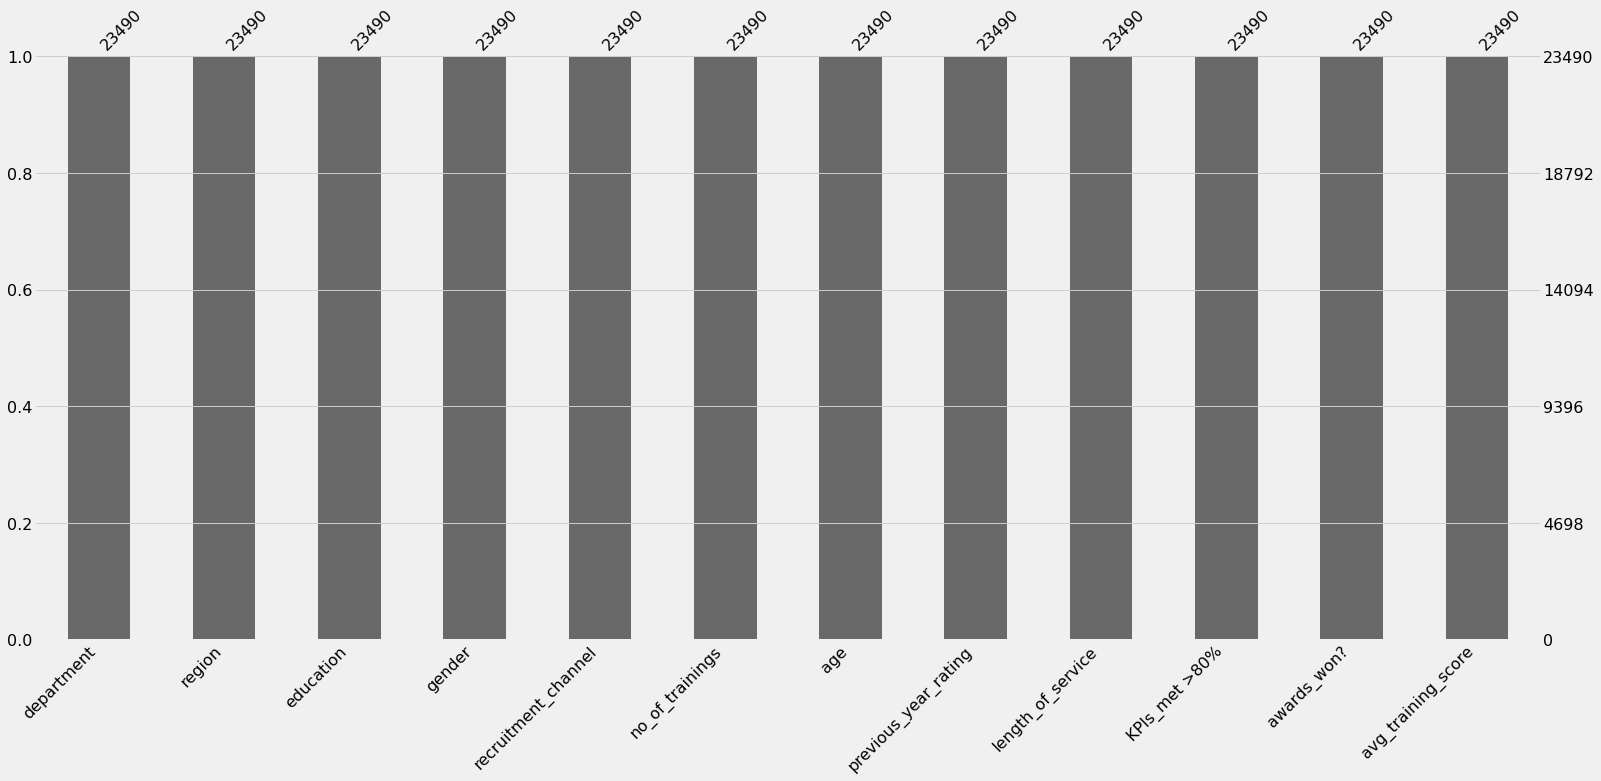

In [31]:
msno.bar(dft.drop('employee_id', axis='columns'))
plt.show()

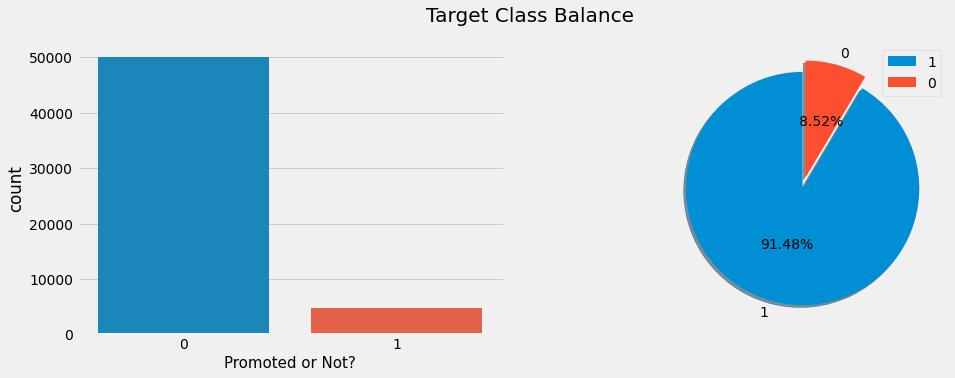

In [32]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 15)

plt.subplot(1, 2, 2)
df['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 20)
plt.legend()
plt.show()

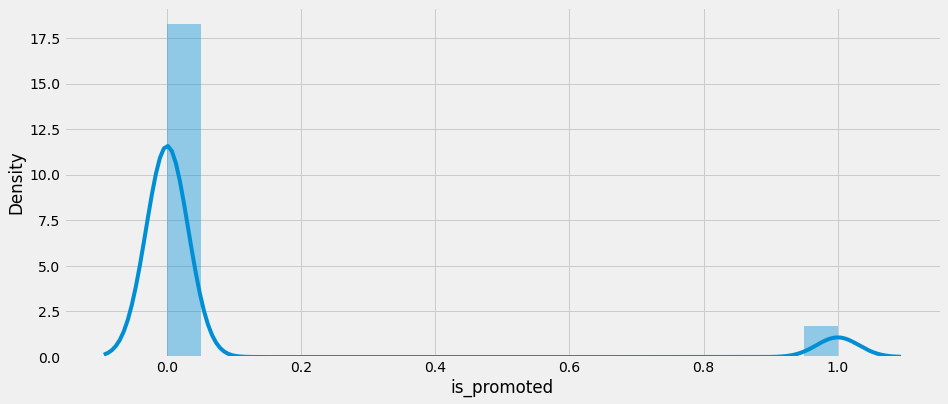

In [33]:
plt.figure(figsize = (14, 6)) 
plt.subplot(1,1,1)
sns.distplot(df["is_promoted"], bins = 20)
plt.show()

In [34]:
df1 = df[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']]

In [35]:
df1.head(10)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0
4,1,45,3.0,2,0,0,73,0
5,2,31,3.0,7,0,0,85,0
6,1,31,3.0,5,0,0,59,0
7,1,33,3.0,6,0,0,63,0
8,1,28,4.0,5,0,0,83,0
9,1,32,5.0,5,1,0,54,0


In [36]:
df1.tail(10)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54798,2,40,5.0,4,1,0,51,0
54799,1,50,5.0,6,1,1,67,0
54800,2,34,5.0,3,0,0,52,0
54801,1,31,3.0,1,0,0,78,0
54802,2,31,1.0,2,0,0,49,0
54803,1,48,3.0,17,0,0,78,0
54804,1,37,2.0,6,0,0,56,0
54805,1,27,5.0,3,1,0,79,0
54806,1,29,1.0,2,0,0,45,0
54807,1,27,1.0,5,0,0,49,0


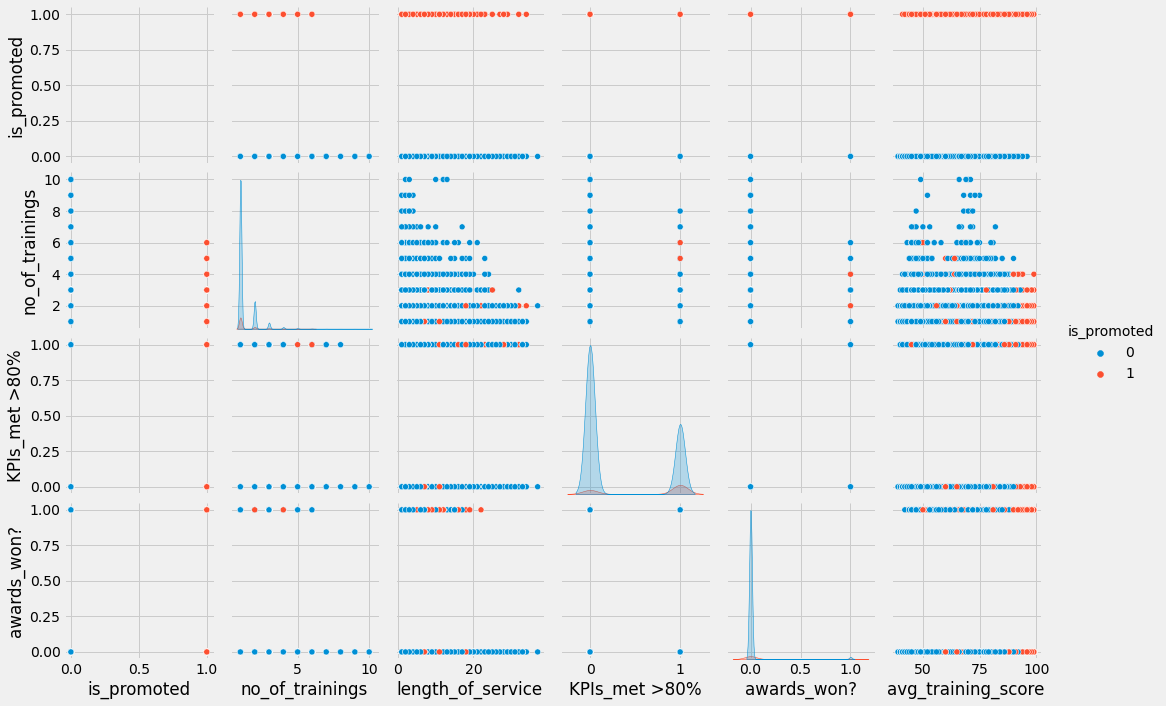

In [37]:
sns.pairplot(df1,
             x_vars = [ 'is_promoted', 'no_of_trainings', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score' ],
             y_vars = [ 'is_promoted', 'no_of_trainings', 'KPIs_met >80%', 'awards_won?' ],
       diag_kind='kde', hue='is_promoted'
             )
plt.show()

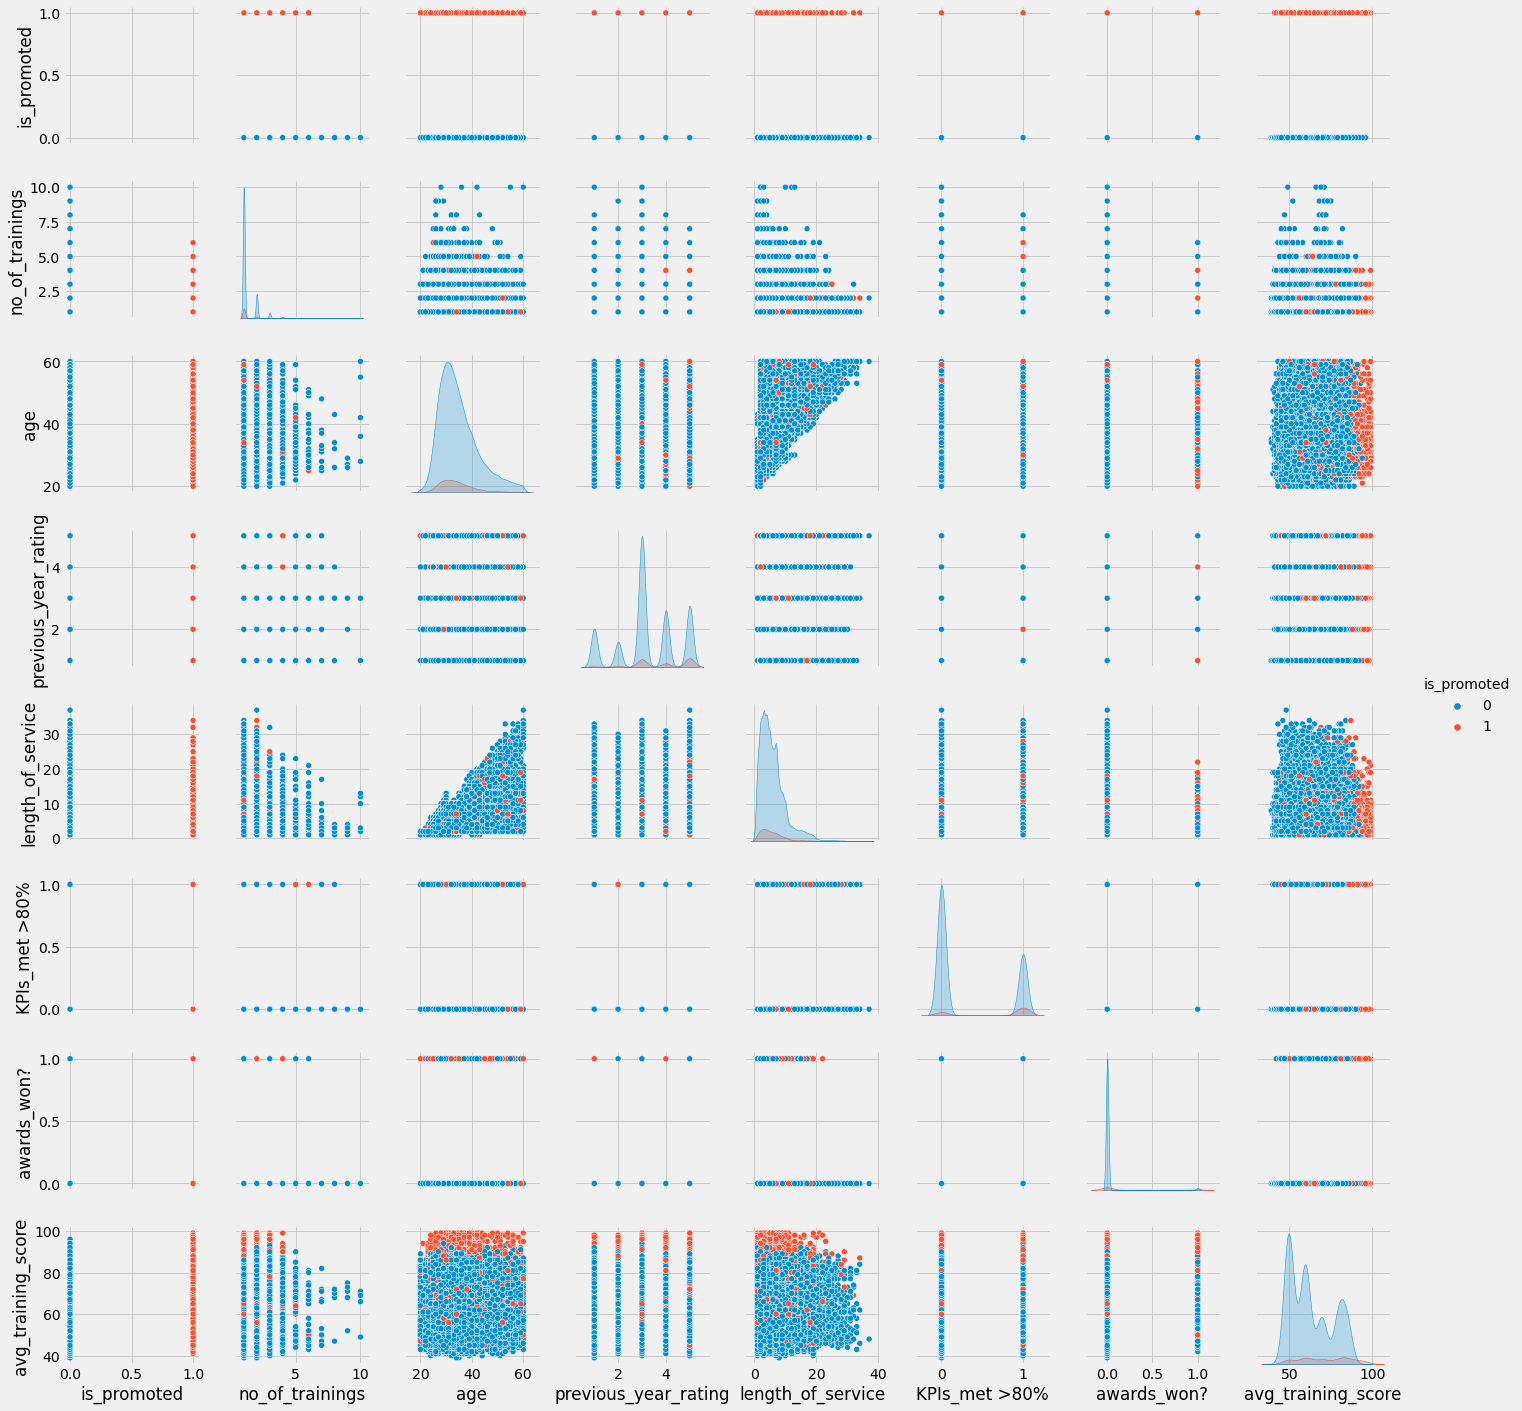

In [38]:
sns.pairplot(df1,
             x_vars = [ 'is_promoted', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
             y_vars = [ 'is_promoted', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score' ],
       diag_kind='kde', hue='is_promoted'
             )
plt.show()

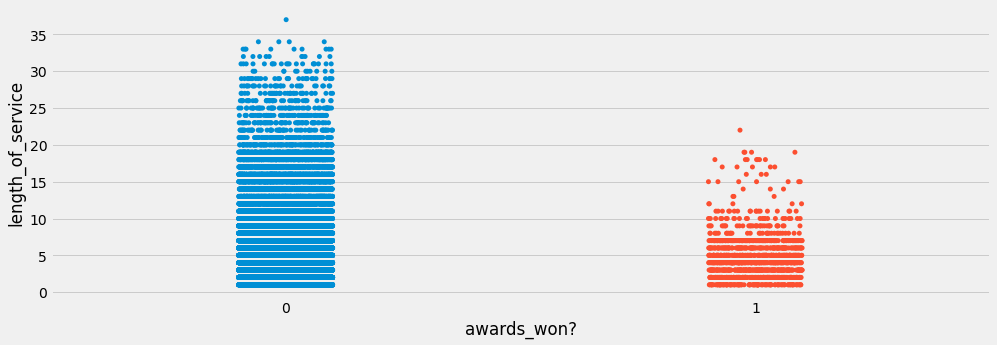

In [39]:
sns.stripplot(y='length_of_service', x='awards_won?', data=df1)

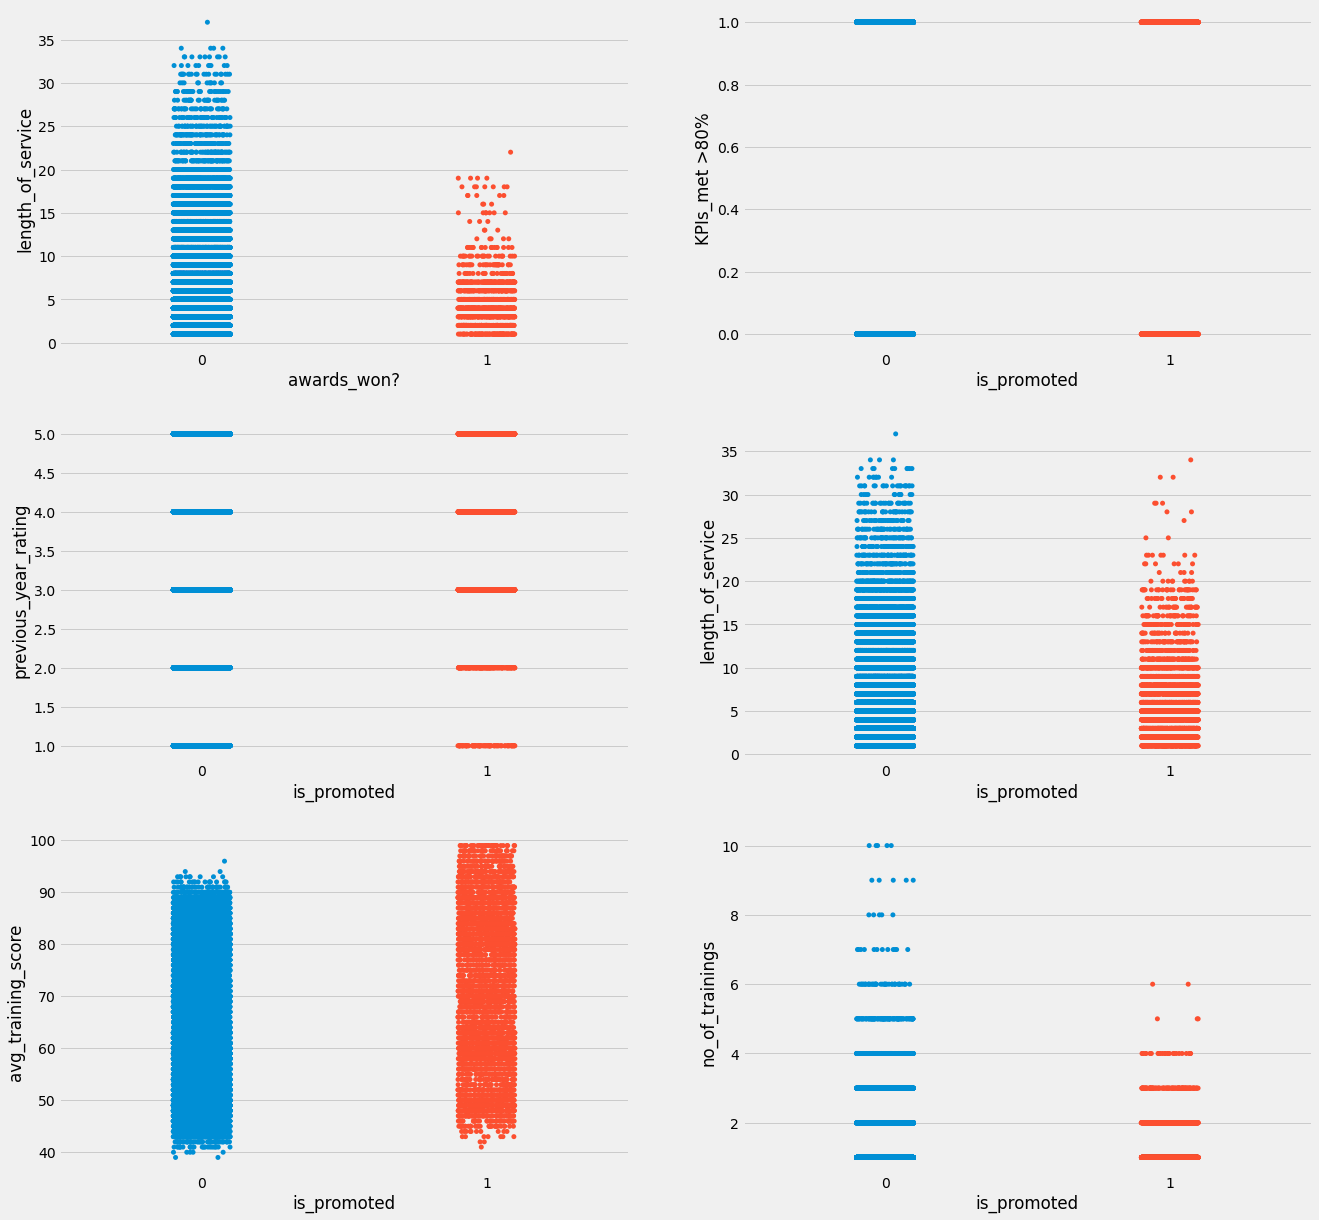

In [40]:
fig, axarr = plt.subplots(3,2, figsize=(20,20))

sns.stripplot(y='length_of_service', x='awards_won?', data=df1, hue=None, ax=axarr[0][0])
sns.stripplot(y='length_of_service', x='is_promoted', data=df1, hue=None, ax=axarr[1][1])
sns.stripplot(y='previous_year_rating', x='is_promoted', data=df1, hue=None, ax=axarr[1][0])
sns.stripplot(y='KPIs_met >80%', x='is_promoted', data=df1, hue=None,  ax=axarr[0][1])
sns.stripplot(y='avg_training_score', x='is_promoted', data=df1, hue=None, ax=axarr[2][0])
sns.stripplot(y='no_of_trainings', x='is_promoted', data=df1, hue=None, ax=axarr[2][1])
plt.show()

In [41]:
df.select_dtypes('number').head(50)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0
5,58896,2,31,3.0,7,0,0,85,0
6,20379,1,31,3.0,5,0,0,59,0
7,16290,1,33,3.0,6,0,0,63,0
8,73202,1,28,4.0,5,0,0,83,0
9,28911,1,32,5.0,5,1,0,54,0


Text(0, 0.5, 'Range')

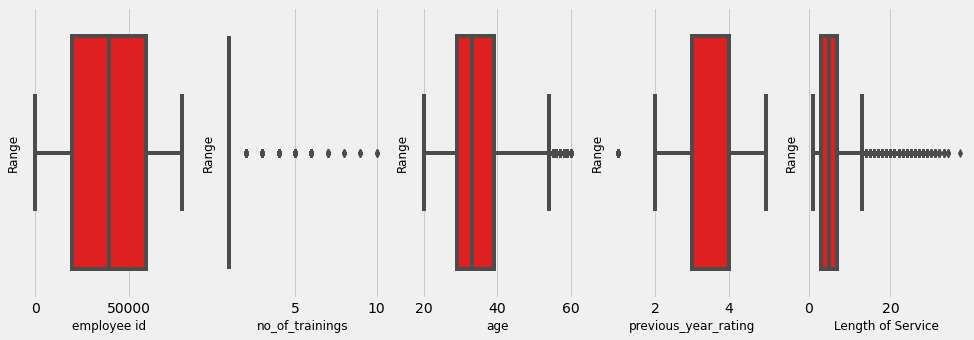

In [42]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 5, 1)
sns.boxplot(df['employee_id'], color = 'red')
plt.xlabel('employee id', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.subplot(1, 5, 2)
sns.boxplot(df['no_of_trainings'], color = 'red')
plt.xlabel('no_of_trainings', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.subplot(1, 5, 3)
sns.boxplot(df['age'], color = 'red')
plt.xlabel('age', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.subplot(1, 5, 4)
sns.boxplot(df['previous_year_rating'], color = 'red')
plt.xlabel('previous_year_rating', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.subplot(1, 5, 5)
sns.boxplot(df['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

Text(0, 0.5, 'Range')

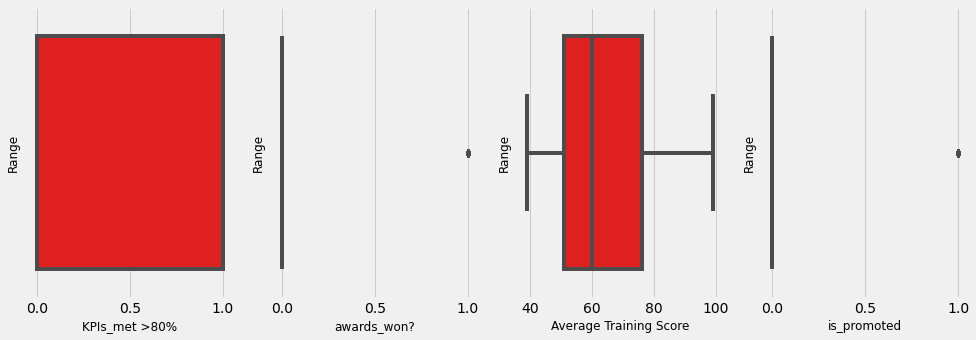

In [43]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 4, 1)
sns.boxplot(df['KPIs_met >80%'], color = 'red')
plt.xlabel('KPIs_met >80%', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.subplot(1, 4, 2)
sns.boxplot(df['awards_won?'], color = 'red')
plt.xlabel('awards_won?', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.subplot(1, 4, 3)
sns.boxplot(df['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.subplot(1, 4, 4)
sns.boxplot(df['is_promoted'], color = 'red')
plt.xlabel('is_promoted', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

In [44]:
df[df['length_of_service'] > 13]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
13,38401,Technology,region_29,Master's & above,m,other,2,39,3.0,16,0,0,80,0
42,23560,HR,region_2,Bachelor's,m,sourcing,1,59,4.0,26,1,0,52,0
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
74,77577,Sales & Marketing,region_7,Bachelor's,m,other,1,50,3.0,14,0,0,52,0
99,51256,Finance,region_2,Master's & above,m,other,1,60,5.0,17,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54691,4210,Analytics,region_2,Master's & above,m,sourcing,1,47,5.0,19,0,0,86,0
54695,41348,Operations,region_2,Bachelor's,f,other,2,52,5.0,18,1,0,56,1
54697,10636,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,47,5.0,15,0,0,50,0
54754,45697,Technology,region_26,Bachelor's,f,other,1,42,3.0,14,0,0,79,0


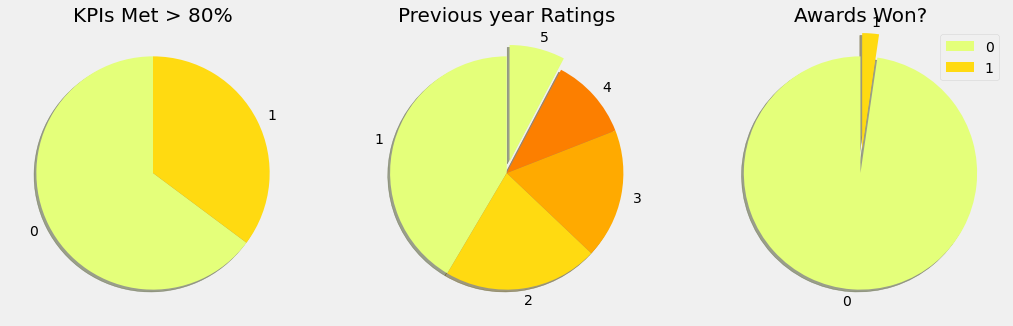

In [45]:
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = df['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 4))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)
 
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = df['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 4))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = df['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 4))
explode = [0,0.2]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)

plt.legend()
plt.show()

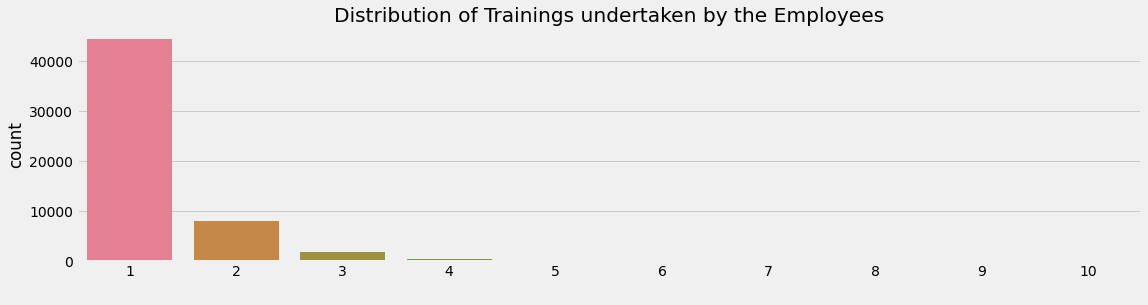

In [46]:
plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(df['no_of_trainings'], palette = 'husl')
plt.xlabel(' ', fontsize = 15)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

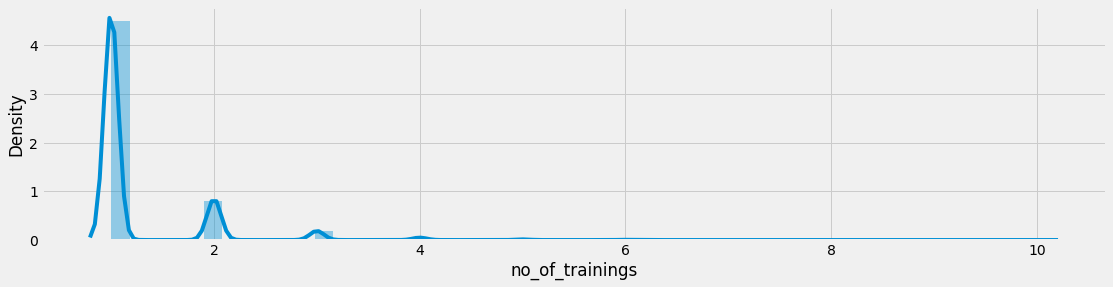

In [47]:
plt.rcParams['figure.figsize'] = (17, 4)
sns.distplot(df['no_of_trainings'])
plt.show()

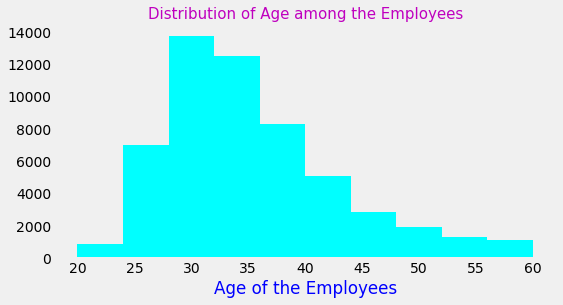

In [48]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(df['age'], color='cyan')
plt.title('Distribution of Age among the Employees', fontsize = 15, c='m')
plt.xlabel('Age of the Employees', color='blue')
plt.grid()
plt.show()

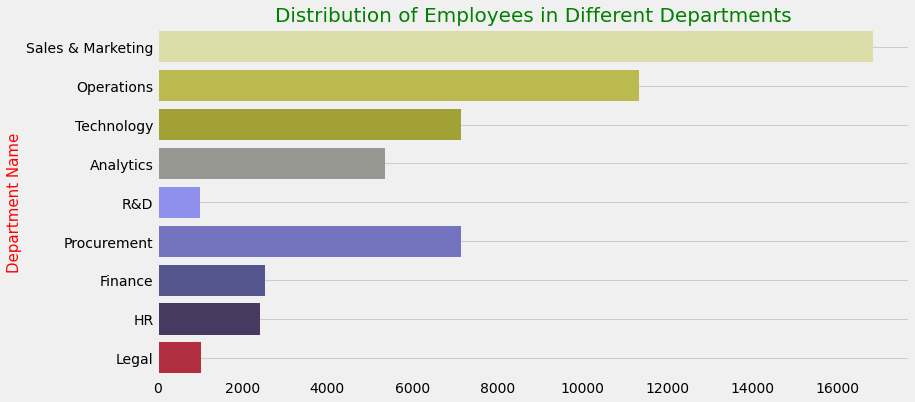

In [49]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = df['department'], palette = 'gist_stern_r', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name', fontsize=15, fontweight=2, color='red')
plt.title('Distribution of Employees in Different Departments', fontsize = 20, fontweight = 2, color='green')
plt.grid()

plt.show()

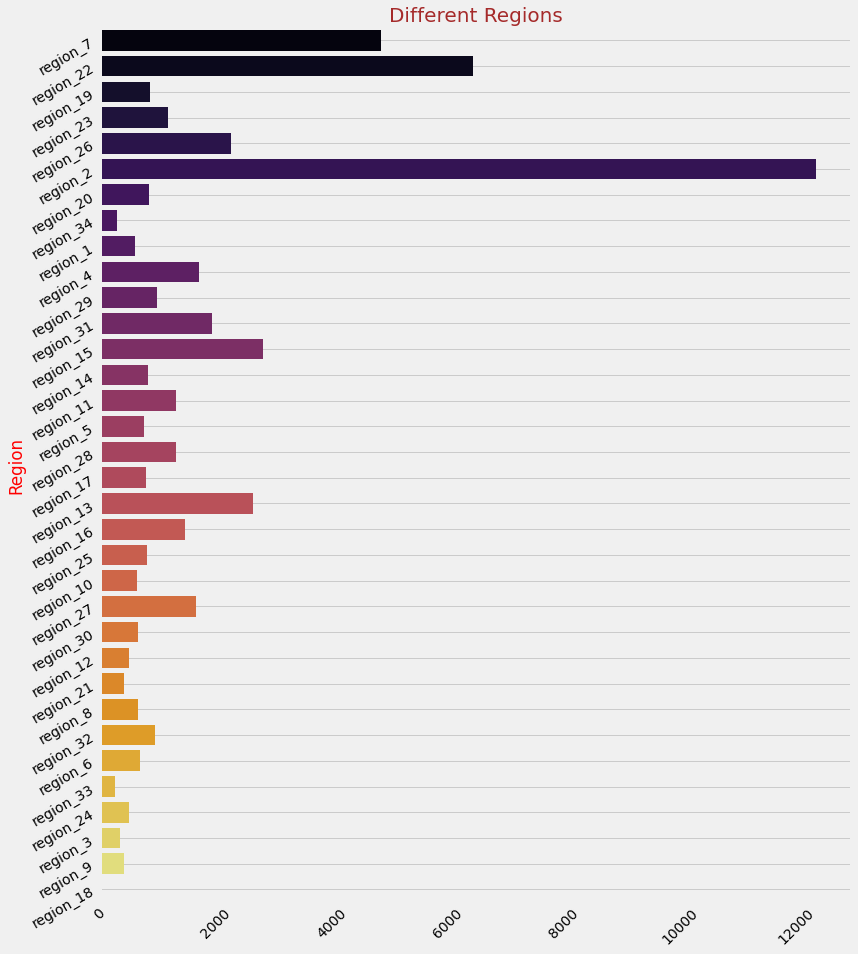

In [50]:
plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = df['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region',color='red', fontweight=2)
plt.title('Different Regions', fontsize = 20, color="brown", fontweight=2)
plt.xticks(rotation = 45)
plt.yticks(rotation = 30)
plt.grid()
plt.show()

Index(['other', 'sourcing', 'referred'], dtype='object')


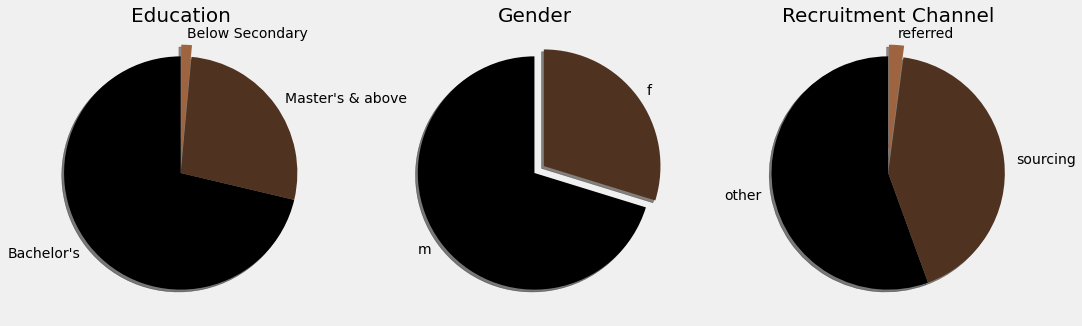

In [51]:
plt.rcParams['figure.figsize'] = (16,5)

plt.subplot(1, 3, 1)
labels = df['education'].value_counts().index
# print(labels)
sizes = df['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

plt.subplot(1, 3, 2)
labels = df['gender'].value_counts().index
sizes = df['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

plt.subplot(1, 3, 3)
labels = df['recruitment_channel'].value_counts().index
print(labels)
sizes = df['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

In [52]:
df2 = df1[['avg_training_score', 'is_promoted']]
df2.head(10)

,avg_training_score,is_promoted
0,49,0
1,60,0
2,50,0
3,50,0
4,73,0
5,85,0
6,59,0
7,63,0
8,83,0
9,54,0


In [53]:
df2.tail(10)

,avg_training_score,is_promoted
54798,51,0
54799,67,0
54800,52,0
54801,78,0
54802,49,0
54803,78,0
54804,56,0
54805,79,0
54806,45,0
54807,49,0


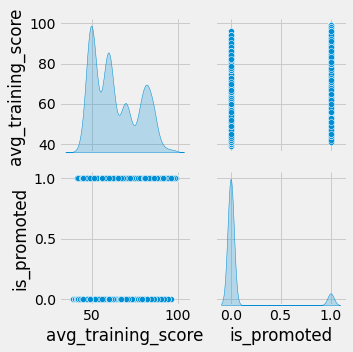

In [54]:
sns.pairplot(df2,
             x_vars = ['avg_training_score', 'is_promoted'],
             y_vars =  ['avg_training_score', 'is_promoted'],
       diag_kind='kde'
             )

In [55]:
dftrain = df2.sample(frac=0.8, random_state=0) 
dftest = df2.drop(dftrain.index)

print(dftrain.head(10))
print(dftest.head(10))

       avg_training_score  is_promoted
28686                  78            0
16191                  76            0
12951                  68            0
7890                   86            1
29387                  66            0
49407                  62            0
6826                   59            0
44010                  56            0
43286                  58            0
918                    48            0
    avg_training_score  is_promoted
10                  77            0
11                  50            1
13                  80            0
19                  59            0
21                  57            0
26                  68            0
30                  72            0
41                  57            0
43                  48            0
49                  73            0


In [56]:
print(dftrain.shape)
print(dftest.shape)

(43846, 2)
(10962, 2)


In [57]:
dftrain = dftrain.copy()
dftest = dftest.copy()

print(dftrain.head(10))
print(dftest.head(10))

       avg_training_score  is_promoted
28686                  78            0
16191                  76            0
12951                  68            0
7890                   86            1
29387                  66            0
49407                  62            0
6826                   59            0
44010                  56            0
43286                  58            0
918                    48            0
    avg_training_score  is_promoted
10                  77            0
11                  50            1
13                  80            0
19                  59            0
21                  57            0
26                  68            0
30                  72            0
41                  57            0
43                  48            0
49                  73            0


In [58]:
dftr = dftrain.pop('is_promoted')
dfte = dftest.pop('is_promoted')

print(dftr.head(10))
print(dfte.head(10))

28686    0
16191    0
12951    0
7890     1
29387    0
49407    0
6826     0
44010    0
43286    0
918      0
Name: is_promoted, dtype: int64
10    0
11    1
13    0
19    0
21    0
26    0
30    0
41    0
43    0
49    0
Name: is_promoted, dtype: int64


In [59]:
print(dftrain.head())
print(dftest.head())

       avg_training_score
28686                  78
16191                  76
12951                  68
7890                   86
29387                  66
    avg_training_score
10                  77
11                  50
13                  80
19                  59
21                  57


In [60]:
import math

numFeatures = len(dftrain.columns)
inputNeurons = (2*numFeatures)/3
print(math.ceil(inputNeurons))

1


In [61]:
import tensorflow as tf 
from tensorflow import keras
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [62]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'mean_absolute_error',
    metrics = ['mae', 'mse']
)

In [63]:
numEpochs = 300
history = model.fit(x = dftrain, y = dftr, validation_data = (dftest, dfte), epochs = numEpochs)

Epoch 1/300
1371/1371 [==============================] - 3s 1ms/step - loss: 0.0854 - mae: 0.0854 - mse: 0.0852 - val_loss: 0.0851 - val_mae: 0.0851 - val_mse: 0.0848
Epoch 2/300
1371/1371 [==============================] - 2s 1ms/step - loss: 0.0854 - mae: 0.0854 - mse: 0.0852 - val_loss: 0.0849 - val_mae: 0.0849 - val_mse: 0.0848
Epoch 3/300
1371/1371 [==============================] - 2s 1ms/step - loss: 0.0854 - mae: 0.0854 - mse: 0.0853 - val_loss: 0.0850 - val_mae: 0.0850 - val_mse: 0.0849
Epoch 4/300
1371/1371 [==============================] - 2s 1ms/step - loss: 0.0854 - mae: 0.0854 - mse: 0.0852 - val_loss: 0.0849 - val_mae: 0.0849 - val_mse: 0.0848
Epoch 5/300
1371/1371 [==============================] - 2s 1ms/step - loss: 0.0854 - mae: 0.0854 - mse: 0.0852 - val_loss: 0.0850 - val_mae: 0.0850 - val_mse: 0.0848
Epoch 6/300
1371/1371 [==============================] - 2s 1ms/step - loss: 0.0854 - mae: 0.0854 - mse: 0.0852 - val_loss: 0.0849 - val_mae: 0.0849 - val_mse: 0.084

In [64]:
features = print(len(dftrain.columns))
print(features)
print(len(dftr))

1
None
43846


In [65]:
df2.to_csv("newData.csv")

In [66]:
print(history)

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 0)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


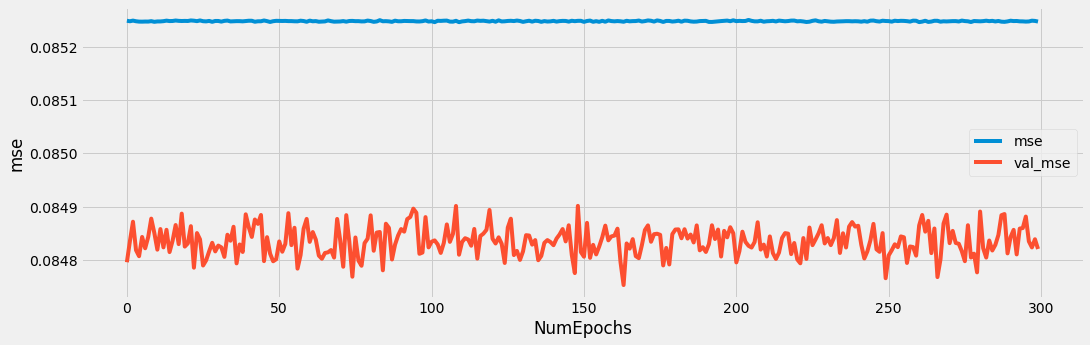

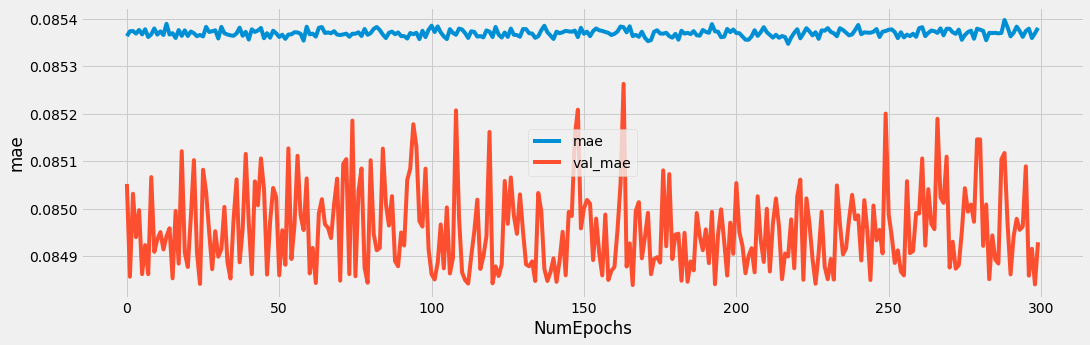

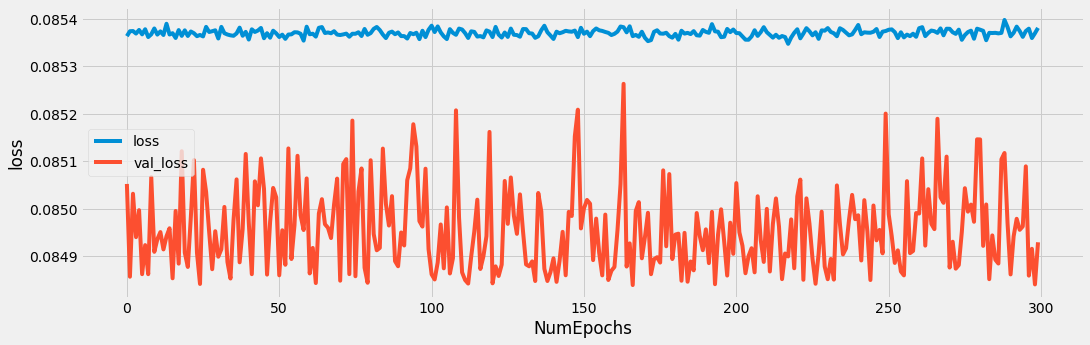

In [68]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [69]:
model.predict([3])

array([[0.00010904]], dtype=float32)

In [70]:
print(f'Prediction for employee rating 3: {model.predict([3])}')

tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for employee rating 3: [[0.00010904]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[0.00010904]
 [0.00010904]
 [0.00010904]
 [0.00010904]
 [0.00010904]]

List of Predictions (flattened out):
[0.00010904 0.00010904 0.00010904 0.00010904 0.00010904]



In [71]:
print(dftest)

       avg_training_score
10                     77
11                     50
13                     80
19                     59
21                     57
...                   ...
54769                  60
54770                  80
54781                  50
54784                  48
54801                  78

[10962 rows x 1 columns]


In [72]:
pred = model.predict(dftest).flatten()

In [73]:
print(len(pred))
print(pred)

10962
[0.00010904 0.00010904 0.00010904 ... 0.00010904 0.00010904 0.00010904]


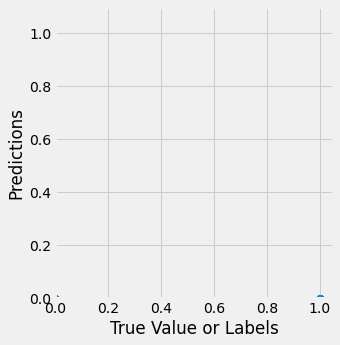

In [74]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(dfte, pred)

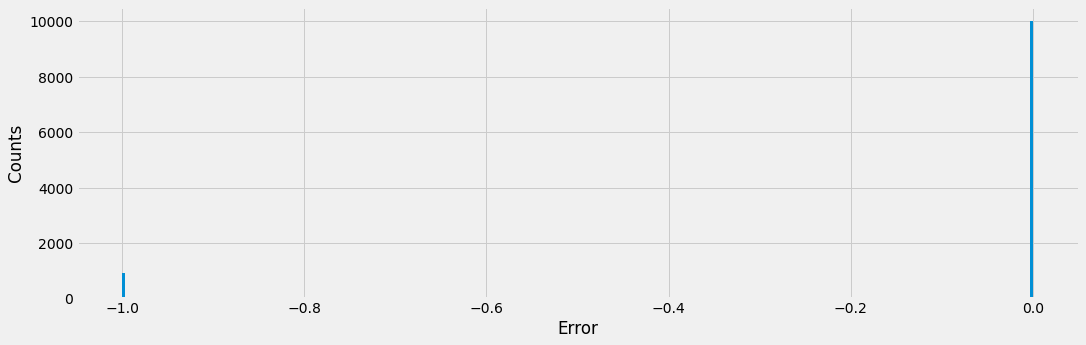

In [75]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(pred, dfte, numEpochs)